 На практике источники данных редко ограничиваются одной таблицей. Например, если мы работаем с базой данных, то данные в ней могут быть представлены в виде нескольких десятков таблиц, каждая из которых несёт отдельную информацию. Если вы делаете выгрузку из базы напрямую, не объединяя таблицы в единую структуру средствами SQL, вам необходимо знать, как работать с такими таблицами средствами Pandas. 

### С какими данными мы работаем?

В этой части модуля мы будем работать с популярным датасетом [MovieLens](https://grouplens.org/datasets/movielens/), в котором собраны логи некоторой рекомендательной системы фильмов.

Скачать таблицы, с которыми мы будем работать, можно [здесь](https://lms-cdn.skillfactory.ru/assets/courseware/v1/bcd86def807792174f50d955515c8be0/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/movies_data.zip) (файлы находятся в zip-архиве — распакуйте архив, прежде чем продолжать работу!)

Наши данные представляют собой четыре таблицы:

1. **ratings1** и **ratings2** — таблицы с данными о выставленных пользователями оценках фильмов. Они имеют одинаковую структуру и типы данных — на самом деле это две части одной таблицы с оценками фильмов.
    - *userId* — уникальный идентификатор пользователя, который выставил оценку;
    - *movieId* — уникальный идентификатор фильма;
    - *rating* — рейтинг фильма.
2. **dates** — таблица с датами выставления всех оценок.
    - *date* — дата и время выставления оценки фильму.
3. **movies** — таблица с информацией о фильмах.
    - *movieId* — уникальный идентификатор фильма;
    - *title* — название фильма и год его выхода;
    - *genres* — жанры фильма.

Итак, представим, что нам надо получить единую таблицу, в которой будут собраны рейтинги, даты выставления рейтингов, а также информация о фильмах. Вот как мы будем действовать:

1. Склеим таблицы ratings1 и ratings2 в единую структуру.
2. К полученной таблице с рейтингами подсоединим столбец с датой проставления рейтинга, склеив столбцы таблиц между собой.
3. Присоединим к нашей таблице информацию о названиях и жанрах фильмов.


### Зачем хранить данные в разных таблицах?

Конечно, здорово, если все необходимые данные лежат в одной таблице, но на практике такое случается редко по двум объективным причинам:

1. Часто данные формируются несколькими независимыми процессами, каждый из которых хранит данные в своей таблице.
*Например, данные для отчёта по продажам могут состоять из списка банковских транзакций, курсов валют от Центробанка и планов отдела продаж из внутренней CRM. Все эти три таблицы, скорее всего, будут формироваться независимыми друг от друга системами. Объединять их в один отчёт придётся вам*.

2. Хранить все данные в одной таблице часто очень накладно для ёмкости диска.
*Например, названия фильмов в наших данных хранятся в отдельной небольшой таблице. А в логах, которые могут растягиваться на многие миллионы строк, вместо названия фильма стоит его идентификатор. Числовой идентификатор фильма занимает на диске гораздо меньше места, чем длинное название, поэтому логи с идентификаторами будут занимать гораздо меньше места, чем единая таблица с названиями.*

In [5]:
import pandas as pd

rating1_data = pd.read_csv('data/movies/ratings1.csv')
rating2_data = pd.read_csv('data/movies/ratings2.csv')
dates_data = pd.read_csv('data/movies/dates.csv')
movies_data = pd.read_csv('data/movies/movies.csv')

Следуя нашему плану объединения таблиц, первым делом мы должны **склеить** таблицы **ratings1** и **ratings2** по строкам.

Для этого воспользуемся встроенной функцией Pandas [concat()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html), которая позволяет склеивать (конкатенировать) таблицы как по строкам, так и по столбцам.

- **objs** — список объектов DataFrame ([df1, df2,…]), которые должны быть сконкатенированы;
- **axis** — ось определяет направление конкатенации: 0 — конкатенация по строкам (по умолчанию), 1 — конкатенация по столбцам;
- **join** — либо **inner** (пересечение), либо **outer** (объединение); рассмотрим этот момент немного позже;
- **ignore_index** — по умолчанию установлено значение **False**, которое позволяет значениям индекса **оставаться** такими, какими они были в **исходных** данных. Если установлено значение **True**, параметр будет **игнорировать исходные** значения и **повторно назначать** значения индекса в последовательном порядке.

Для корректной конкатенации по строкам объединяемые таблицы должны иметь одинаковую структуру — идентичное число и имена столбцов.

Итак, давайте склеим  ratings1 и ratings2 по строкам, так как они имеют одинаковую структуру столбцов. Для этого передадим их списком в функцию concat(). Помним, что параметр axis по умолчанию равен 0, объединение происходит по строкам, поэтому не трогаем его. 

Примечание. Обратите внимание, что concat является функцией библиотеки, а не методом DataFrame. Поэтому её вызов осуществляется как pd.concat(...).

In [6]:
rating_data = pd.concat([rating1_data,rating2_data], axis=0)

In [7]:
display(rating_data)

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0
...,...,...,...
60831,610,166534,4.0
60832,610,168248,5.0
60833,610,168250,5.0
60834,610,168252,5.0


В результате мы увеличили первую таблицу, добавив снизу строки второй таблицы.

На первый взгляд может показаться, что всё прошло успешно, однако если мы посмотрим на индексы последних строк таблицы, то увидим, что их нумерация не совпадает с количеством строк. Это может привести к некорректному объединению таблиц по ключевым столбцам на следующем этапе решения нашей задачи.

Это связано с тем, что по умолчанию concat сохраняет первоначальные индексы объединяемых таблиц, а обе наши таблицы индексировались, начиная от 0. Чтобы создать новые индексы, нужно выставить параметр ignore_index на True:

In [8]:
rating_data = pd.concat([rating1_data,rating2_data], axis=0,ignore_index=True)
display(rating_data)

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0
...,...,...,...
100832,610,166534,4.0
100833,610,168248,5.0
100834,610,168250,5.0
100835,610,168252,5.0


Казалось бы, совсем другое дело! Но это ещё не всё. Давайте узнаем количество строк в таблицах **ratings** и **dates**, ведь нам предстоит вертикально склеить их между собой:

In [9]:
print('Число строк в таблице ratings: ', rating_data.shape[0])
print('Число строк в таблице dates: ', dates_data.shape[0])
print(rating_data.shape[0] == dates_data.shape[0])

Число строк в таблице ratings:  100837
Число строк в таблице dates:  100836
False


Размерность таблиц разная — как такое могло произойти?

На самом деле очень просто: при выгрузке данных информация об оценках какого-то  пользователя попала в обе таблицы (ratings1 и ratings2). В результате конкатенации случилось дублирование строк. 

В данном примере их легко найти — выведем последнюю строку таблицы ratings1 и первую строку таблицы ratings2:

In [10]:
display(rating1_data.tail(1))
display(rating2_data.head(1))

,userId,movieId,rating
40000,274,5621,2.0


,userId,movieId,rating
0,274,5621,2.0


### Чтобы очистить таблицу от дублей, 
мы можем воспользоваться методом DataFrame [drop_duplicates()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html), который удаляет повторяющиеся строки в таблице. Не забываем обновить индексы после удаления дублей, выставив параметр ignore_index в методе drop_duplicates() на значение True:

In [11]:
rating_data = rating_data.drop_duplicates(ignore_index=True)
print('Число строк в таблице ratings: ', rating_data.shape[0])

Число строк в таблице ratings:  100836


In [12]:
# Наконец, мы можем добавить к нашей таблице с оценками даты их выставления. 
# Для этого конкатенируем таблицы ratings и dates по столбцам:

ratings_dates = pd.concat([rating_data,dates_data],axis=1)
display(ratings_dates)

,userId,movieId,rating,date
0,1,1,4.0,2000-07-30 18:45:03
1,1,3,4.0,2000-07-30 18:20:47
2,1,6,4.0,2000-07-30 18:37:04
3,1,47,5.0,2000-07-30 19:03:35
4,1,50,5.0,2000-07-30 18:48:51
...,...,...,...,...
100831,610,166534,4.0,2017-05-03 21:53:22
100832,610,168248,5.0,2017-05-03 22:21:31
100833,610,168250,5.0,2017-05-08 19:50:47
100834,610,168252,5.0,2017-05-03 21:19:12


У таблиц **ratings** и **movies** есть общий столбец **movieId**, который каждому фильму из таблицы movies ставит в соответствие поставленные ему оценки из таблицы ratings. Мы хотим объединить их в единую структуру согласно этому соответствию. Объединения такого рода часто называют **объединением по ключевому столбцу**.

Однако прежде чем мы перейдём к дальнейшей работе с нашими таблицами о фильмах, мы должны рассмотреть основные типы объединения таблиц.

### Типы объединений

Типы объединений в Pandas тесно связаны с операцией **join** из SQL, которую мы будем рассматривать в курсе в дальнейшем.

Они представлены на схеме ниже в виде кругов Эйлера. 
![image.png](attachment:image.png)

Прежде чем мы перейдём к дальнейшей работе с таблицами о фильмах, рассмотрим два основных типа объединения таблиц:

1. **inner** (внутреннее)

При использовании такого типа объединения в результирующей таблице остаются только те записи, которые есть в обеих таблицах.

*Аналогия в теории множеств: Пересечение (intersection) множеств А и В.*

Строки, для которых совпадение не было найдено, удаляются.

2. **outer** (внешнее)

Данный тип делится на три подтипа:

 - **full** — используется как outer по умолчанию, объединяет все варианты в обеих таблицах.
    *Аналогия в теории множеств: Объединение (union) множеств А и В.*

- **left** — для всех записей из «левой» таблицы (например, ratings) ведётся поиск соответствий в «правой» (например, movies). В результирующей таблице останутся только те значения, которым были найдены соответствия, то есть только значения из ratings.
    *Аналогия в теории множеств: Вычитание (difference) множества B из результата объединения (union) множеств А и В.*

- **right** — аналогично предыдущему, но остаются значения только из «правой» таблицы. 
    *Аналогия в теории множеств: Вычитание (difference) множества А из результата объединения (union) множеств А и В.*

Примечание: Во всех трёх случаях, если совпадений между таблицами не найдено, на этом месте ставится пропуск (NaN).

### Метод объединения join

Для объединения двух таблиц по индексам используется метод DataFrame [join()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html). Однако данный метод можно применить и для того, чтобы объединить таблицы по ключевому столбцу (в нашем случае это movieId).

**Основные параметры метода join()**

- **other** — таблица, которую мы присоединяем. При объединении она является **«правой»**, а исходная таблица, от имени которой вызывается метод, является **«левой»**.
- **how** — параметр типа объединения. Он может принимать значения 'inner', 'left' (left outer), 'right' (right outer), и 'outer' (full outer). По умолчанию параметр установлен на 'left'.
- **on** — параметр, который определяет, по какому столбцу в «левой» таблице происходит объединение по индексам из «правой».
- **lsuffix** и **rsuffix** — дополнения (суффиксы) к названиям одноимённых столбцов в «левой» и «правой» таблицах.

### общая схема работы 
метода join() в зависимости от типа объединения:

![image.png](attachment:image.png)

Если использовать метод **join() «в лоб»** (без указания ключевого столбца), то **объединение** произойдёт, как и задумано — **по индексам** двух таблиц согласно установленному типу объединения.

In [13]:
#Проверим это, объединив таблицы типом left. Так как в наших таблицах есть одноимённые столбцы, 
# установим один из суффиксов, чтобы избежать ошибки:

joined_false = rating_data.join(
    movies_data,
    rsuffix='_right',
    how='left'
)
display(joined_false)

,userId,movieId,rating,movieId_right,title,genres
0,1,1,4.0,1.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,2.0,Jumanji (1995),Adventure|Children|Fantasy
2,1,6,4.0,3.0,Grumpier Old Men (1995),Comedy|Romance
3,1,47,5.0,4.0,Waiting to Exhale (1995),Comedy|Drama|Romance
4,1,50,5.0,5.0,Father of the Bride Part II (1995),Comedy
...,...,...,...,...,...,...
100831,610,166534,4.0,NaN,NaN,NaN
100832,610,168248,5.0,NaN,NaN,NaN
100833,610,168250,5.0,NaN,NaN,NaN
100834,610,168252,5.0,NaN,NaN,NaN


Однако это не тот результат, который мы хотели, ведь мы не получили соответствия фильмов и их рейтингов. Чтобы совместить таблицы по ключевому столбцу с помощью метода join(), необходимо использовать ключевой столбец в «правой» таблице в качестве индекса. Это можно сделать с помощью метода set_index(). Также необходимо указать название ключа в параметре on.

In [14]:
joined = rating_data.join(
    movies_data.set_index('movieId'),
    on='movieId',
    how='left'
)
display(joined.head())

,userId,movieId,rating,title,genres
0,1,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


В результате такого объединения для каждого идентификатора фильма movieId в таблице ratings_dates найден совпадающий с ним идентификатор movieId в таблице movies и присоединена информация о самом фильме (title и genres). Это как раз то, что нам нужно.

Обратите внимание, что в результате такого объединения остался лишь один столбец movieId.

*Примечание. Join() также можно использовать с параметром how='outer'.*

### Метод объединения merge

Аналогично предыдущему, метод [merge()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html) предназначен для **слияния двух таблиц по ключевым столбцам или по индексам**. Однако, в отличие от join(), метод merge() предлагает более гибкий способ управления объединением, благодаря чему является более популярным.

#### Основные параметры метода merge()

- **right** — присоединяемая таблица. По умолчанию она является «правой».
- **how** — параметр типа объединения. По умолчанию принимает значение 'inner'.
- **on** — параметр, который определяет, по какому столбцу происходит объединение. Определяется автоматически, но рекомендуется указывать вручную.
- **left_on** — если названия столбцов в «левой» и «правой» таблицах не совпадают, то данный параметр отвечает за наименования ключевого столбца исходной таблицы.
- **right_on** — аналогично предыдущему, параметр отвечает за наименование ключевого столбца присоединяемой таблицы.

Метод merge() в первую очередь предназначен для слияния таблиц по заданным ключам, поэтому он не требует установки ключевых столбцов в качестве индекса присоединяемой таблицы. Кроме того, данный метод позволяет объединять даже таблицы с разноимёнными ключами. Таким образом, merge() проще в использовании и более многофункционален, чем схожие методы.

Посмотрим на метод merge() в действии. Произведём слияние наших таблиц и получим ту же таблицу, что и ранее:

In [15]:
merged = rating_data.merge(
    movies_data,
    on='movieId',
    how='left'
)
display(merged.head())

,userId,movieId,rating,title,genres
0,1,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


In [16]:
#Проверим, что число строк в таблице ratings_dates совпадает с числом строк в результирующей таблице merged:

print('Число строк в таблице ratings_dates: ', ratings_dates.shape[0])
print('Число строк в таблице merged: ', merged.shape[0])
print(ratings_dates.shape[0] == merged.shape[0])

Число строк в таблице ratings_dates:  100836
Число строк в таблице merged:  100836
True


#### Особенности использования merge()

Возникает вопрос: почему мы выбрали тип объединения left, а не full, например?

Найти ответ нам поможет пример. Объединим ratings_dates с movies по ключевому столбцу movieId, но с параметром how='outer' (full outer) и выведем размер таблицы, а также её «хвост»:

In [18]:
merged2 = rating_data.merge(
    movies_data,
    on='movieId',
    how='outer'
)
print('Число строк в таблице merged2: ', merged2.shape[0])
display(merged2)

Число строк в таблице merged2:  100854


,userId,movieId,rating,title,genres
0,1.0,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5.0,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7.0,1,4.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15.0,1,2.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17.0,1,4.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
...,...,...,...,...,...
100849,184.0,193581,4.0,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
100850,184.0,193583,3.5,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
100851,184.0,193585,3.5,Flint (2017),Drama
100852,184.0,193587,3.5,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


Результирующее число строк в таблице увеличилось. **Но за счёт чего?**

Оказывается, в таблице movies содержались фильмы, которым ещё не были выставлены оценки. В результате объединения типом full outer информация о фильмах перенеслась из таблицы movies в результирующую таблицу. Однако, поскольку оценки фильмам ещё не были выставлены, соответствующие столбцы таблицы ratings_dates заполнились пропусками (NaN). Такие фильмы были записаны в конец таблицы.

**Важно!** Учитывайте такие нюансы при работе с несколькими таблицами и всегда проверяйте результат объединения.

Метод **merge() с внешним (outer)** типом объединения может использоваться **как аналог метода concat()** при объединении таблиц с одинаковой структурой (одинаковые количество и названия столбцов) по строкам. В таком случае все одноимённые столбцы таблиц будут считаться ключевыми.

Рассмотрим пример: объединим таблицы ratings1 и ratings2, как мы уже делали раньше, но теперь используем метод merge():

In [19]:
merge_ratings = rating1_data.merge(rating2_data, how='outer')
print('Число строк в таблице merge_ratings: ', merge_ratings.shape[0])
display(merge_ratings)

Число строк в таблице merge_ratings:  100836


,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0
...,...,...,...
100831,610,166534,4.0
100832,610,168248,5.0
100833,610,168250,5.0
100834,610,168252,5.0


Обратите внимание, что при использовании метода merge() для склейки двух таблиц у нас автоматически пропали дубликаты, которые мы видели при использовании метода concat(). **Это особенность метода merge() — автоматическое удаление дублей.**

### Какой метод объединения использовать?

Итак, мы рассмотрели три основных метода объединения таблиц: concat(), join() и merge(). Давайте структурируем материал, изложенный ранее, в виде небольшой блок-схемы, которая поможет вам определить, какой метод является предпочтительным при объединении таблиц.

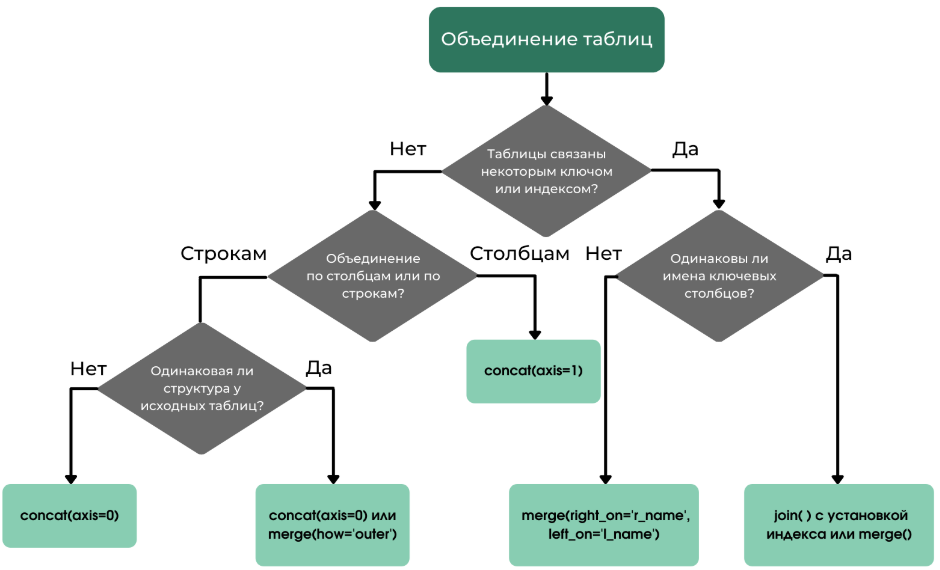